In [1]:
# Importation des packages
import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
#import matplotlib.pyplot as plt
import scipy.sparse as sparse
import threading
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.metrics import binary_accuracy
from sklearn.model_selection import GridSearchCV
import keras
from keras.optimizers import sgd,adam,adagrad,adamax,adagrad
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# Decorateur de calcu de temps d'exécution
def timing(func):
    def wrapper(*args, **kwargs):
        print("Calculation start for: ")
        print(f"{threading.current_thread().name}\n")
        start = time.perf_counter()
        data = func(*args, **kwargs)
        print("Task Finished for:")
        print(f"{threading.current_thread().name}\n")
        end = time.perf_counter()
        print(f"Execution time: {round(end-start,2)} second(s)")
        return data
    return wrapper

In [3]:
# Parallelisation avec les process
@timing
def parallelethread(func, list_args):
    import concurrent.futures
    with concurrent.futures.ThreadPoolExecutor() as executor:
        res = [executor.submit(func, x) for x in list_args]
    for i, r in enumerate(concurrent.futures.as_completed(res)):
        resultat = r.result()
        print(resultat)

# Parrallelisation avec les thread
@timing
def paralleleprocess(func, list_args):
    import concurrent.futures
    with concurrent.futures.ProcessPoolExecutor() as executor:
        res = [executor.submit(func, x) for x in list_args]
    for i, r in enumerate(concurrent.futures.as_completed(res)):
        resultat = r.result()
        print(resultat)

In [4]:
# Définition d'un fonction de training de modèle
@timing
def training(model):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    #score = {"Model":model, "Score":accuracy_score(y_val,y_pred)}
    score_train = accuracy_score(y_train,y_pred_train)
    score_val = accuracy_score(y_val,y_pred_val)
    score_test = accuracy_score(y_test,y_pred_test)
    print(f"ERREUR DE TRAIN: {score_train}")
    print(f"ERREUR DE VALIDATION: {score_val}")
    print(f"ERREUR DE TEST: {score_test}")
    return model

In [5]:
# Fonction d'importation du jeu de données
@timing
def read_data(path):
    d = pd.read_csv(path)
    return d

In [6]:
# Importation des variables indépendantes
df_X = read_data("X.csv")

Calculation start for: 
MainThread

Task Finished for:
MainThread

Execution time: 6.06 second(s)


In [7]:
# Importation des variables cibles
df_y = read_data("y_1.csv")

Calculation start for: 
MainThread

Task Finished for:
MainThread

Execution time: 0.5 second(s)


In [8]:
df_X.shape

(100000, 145)

In [9]:
X = df_X.copy()
y = df_y.copy()

In [10]:
pd.set_option('display.max_columns',179)
pd.set_option('display.max_rows',179)

In [11]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,NO,NO,rpoSk1aXo+6hZQxVMp/PAw8+w67/vzWkyQs/xGqFCnw=,hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=,0.837674,0.072627,0.869502,0.279803,0.297919,NO,NO,NO,NO,NO,2,0.619213,1,8,0.995370,0.0,0.94,4565,3456,NO,NO,NO,3,0.623843,0.285871,NO,NO,NO,NO,rpoSk1aXo+6hZQxVMp/PAw8+w67/vzWkyQs/xGqFCnw=,hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=,0.837674,0.072627,0.869502,0.279803,0.297919,NO,NO,NO,NO,NO,2,0.619213,1,8,0.995370,0.0,0.94,4565,3456,NO,NO,NO,3,0.623843,0.285871,EfLSpSt1wC0MjAdFeWuFDYR2laBmHlXisFYHkb7CIIQ=,NO,NO,X/hdUOVR5KuExVGLzjhLcM2CyIqym9t0Nh+ZX05M+1w=,+yhSY//Hpg7u0bSA7NYmcmRFgv3bF4Tw3BMHrBqaTtA=,0.837674,0.072627,0.869502,0.279803,0.298795,YES,NO,YES,NO,YES,1,0.315104,1,8,0.994792,0.0,0.83,4565,3456,YES,NO,YES,3,0.320312,0.286966,UB4XMFemJzxaAfdj75Bwjm7xYNDCzCkUk7ANRZlr034=,NO,NO,X/hdUOVR5KuExVGLzjhLcM2CyIqym9t0Nh+ZX05M+1w=,+yhSY//Hpg7u0bSA7NYmcmRFgv3bF4Tw3BMHrBqaTtA=,0.837674,0.072627,0.869502,0.279803,0.298795,YES,NO,YES,NO,YES,1,0.315104,1,8,0.994792,0.0,0.83,4565,3456,YES,NO,YES,3,0.320312,0.286966,0.837674,0.072627,0.869502,0.279803,0.298795,YES,NO,YES,NO,YES,0,0.315104,3,8,0.990917,7.0,0.885000,4565,3456,YES,NO,YES,4,0.623843,0.285871
1,NO,NO,/VV6+dCb+in5lV7V/e9b5HoZ/BN34M+dPmKWY8BeHh4=,hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=,1.289474,0.082577,0.948578,0.069268,0.527802,NO,NO,NO,NO,NO,41,0.937689,1,17,0.998790,0.0,0.85,4676,3306,NO,NO,NO,0,0.938899,0.526518,NO,NO,NO,NO,vBrSPPWbvTBrPn/YdHWxt+pFeV6E5wPpNjXS8RILB88=,N8wBprLMRuVKWZMBXX9JHVBdT6S9zQ+NL1ZfWnoGQrk=,1.289474,0.082577,0.948578,0.069268,0.526518,YES,NO,NO,NO,NO,39,0.926195,3,5,0.993950,0.0,0.60,4676,3306,YES,NO,YES,1,0.932244,0.517964,0DeSv/rVzbodXvNJK0+KRGddE1skGm60/T8G7xoLB4g=,NO,NO,m/m91A62TG6D7crdQTdYd9eeMO8xNcbN7N7iwgclLp0=,+yhSY//Hpg7u0bSA7NYmcmRFgv3bF4Tw3BMHrBqaTtA=,1.289474,0.082577,0.948578,0.069268,0.537639,YES,NO,YES,NO,YES,48,0.926800,1,17,0.994555,0.0,0.65,4676,3306,YES,NO,YES,2,0.932244,0.530796,N8wBprLMRuVKWZMBXX9JHVBdT6S9zQ+NL1ZfWnoGQrk=,NO,NO,wVxsLFUAZzdPJIUFpt1aktySAsTOyUo72bEDtGlI+RQ=,IoM2E9pNxABFR+H3yfapUL+ThKm7GtTzY7js9H/H99o=,1.289474,0.082577,0.948578,0.069268,0.534645,NO,NO,NO,NO,NO,2,0.650938,8,17,0.966727,0.0,0.72,4676,3306,NO,NO,NO,0,0.684211,0.529940,1.289474,0.082577,0.948578,0.069268,0.530368,YES,NO,NO,NO,NO,19,0.924985,3,17,0.992740,0.0,0.670000,4676,3306,YES,NO,YES,0,0.932244,0.526946
2,YES,YES,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,0.653912,0.041257,0.941000,0.090423,0.422868,YES,NO,NO,NO,NO,38,0.651347,4,15,0.982471,0.0,0.97,3306,4678,YES,NO,YES,4,0.668876,0.412886,NO,NO,YES,NO,YDvUCZu63XmryhV8xiJBhsWEYeM3giPDKXmzpKBDxdc=,B+EJpnEbkYtLnwDQYN1dP1rcfnoCnxAjKLYwQZE07Ew=,0.653912,0.041257,0.941000,0.090423,0.422868,YES,NO,NO,NO,NO,34,0.576956,5,15,0.976913,0.0,0.95,3306,4678,YES,NO,YES,3,0.600043,0.412886,bCou8rTLsVvraVfOMQ+PxfDbaX5b2+tIkuRaNCGPgEw=,YES,YES,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,0.653912,0.041257,0.941000,0.090423,0.424077,YES,NO,NO,NO,NO,36,0.433091,4,15,0.982257,0.0,0.97,3306,4678,YES,NO,YES,7,0.450834,0.414096,Q4Bg+jJRQ1ivy6iLEkWu2O+LgzkeqHGxW+q3MXgJqtc=,YES,YES,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,0.653912,0.041257,0.941000,0.090423,0.424077,YES,NO,NO,NO,NO,36,0.433091,4,15,0.982257,0.0,0.97,3306,4678,YES,NO,YES,7,0.450834,0.414096,0.653912,0.041257,0

In [12]:
y.head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Traitement des données

In [14]:
col_cat = X.dtypes[X.dtypes=='object'].index
col_cont = X.dtypes[X.dtypes=='float64'].index
col_num = X.dtypes[X.dtypes=='int64'].index

In [15]:
len(X[col_cat].columns)

60

In [16]:
X[col_num].head()

,x15,x17,x18,x22,x23,x27,x46,x48,x49,x53,x54,x58,x76,x78,x79,x83,x84,x88,x106,x108,x109,x113,x114,x118,x131,x133,x134,x138,x139,x143
0,2,1,8,4565,3456,3,2,1,8,4565,3456,3,1,1,8,4565,3456,3,1,1,8,4565,3456,3,0,3,8,4565,3456,4
1,41,1,17,4676,3306,0,39,3,5,4676,3306,1,48,1,17,4676,3306,2,2,8,17,4676,3306,0,19,3,17,4676,3306,0
2,38,4,15,3306,4678,4,34,5,15,3306,4678,3,36,4,15,3306,4678,7,36,4,15,3306,4678,7,0,15,15,3306,4678,11
3,6,1,16,4677,3307,2,7,1,14,4677,3307,2,7,1,16,4677,3307,4,9,1,16,4677,3307,1,7,1,16,4677,3307,4
4,4,5,9,892,1262,7,1,6,9,892,1262,6,1,6,9,892,1262,6,1,8,9,892,1262,5,0,21,9,892,1262,7


In [17]:
col_to_scale = col_num.copy()
len(col_to_scale)

30

In [18]:
X.replace("YES",1, inplace=True)
X.replace("NO",0, inplace=True)

In [19]:
len(col_to_scale)

30

## Option 1: laisser tomber les variales encodées

Puisque le but principal du projet est de developper et améliorer la performance des modèles avec les differentes techniques, et que nous ne devrions pas perdre assez de temps sur la partie de data cleaning, nous avons donc décider de retirer les colonnes encodé car, nous n'avions pas assez d'information sur la définition de ces colonnes afin de les transformer adéquatement

In [ ]:
col_to_drop = X.dtypes[X.dtypes=='object'].index
X.drop(labels=col_to_drop, axis=1, inplace=True)

### Feature scaling

Puisque le modèle de reseau de neurones est sensibles aux valeur extremes, nous allons donc standardiser les variables continues

In [21]:
X.head()

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x62,x63,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x92,x93,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,0,0,0.837674,0.072627,0.869502,0.279803,0.297919,0,0,0,0,0,2,0.619213,1,8,0.995370,0.0,0.94,4565,3456,0,0,0,3,0.623843,0.285871,0,0,0,0,0.837674,0.072627,0.869502,0.279803,0.297919,0,0,0,0,0,2,0.619213,1,8,0.995370,0.0,0.94,4565,3456,0,0,0,3,0.623843,0.285871,0,0,0.837674,0.072627,0.869502,0.279803,0.298795,1,0,1,0,1,1,0.315104,1,8,0.994792,0.0,0.83,4565,3456,1,0,1,3,0.320312,0.286966,0,0,0.837674,0.072627,0.869502,0.279803,0.298795,1,0,1,0,1,1,0.315104,1,8,0.994792,0.0,0.83,4565,3456,1,0,1,3,0.320312,0.286966,0.837674,0.072627,0.869502,0.279803,0.298795,1,0,1,0,1,0,0.315104,3,8,0.990917,7.0,0.885000,4565,3456,1,0,1,4,0.623843,0.285871
1,0,0,1.289474,0.082577,0.948578,0.069268,0.527802,0,0,0,0,0,41,0.937689,1,17,0.998790,0.0,0.85,4676,3306,0,0,0,0,0.938899,0.526518,0,0,0,0,1.289474,0.082577,0.948578,0.069268,0.526518,1,0,0,0,0,39,0.926195,3,5,0.993950,0.0,0.60,4676,3306,1,0,1,1,0.932244,0.517964,0,0,1.289474,0.082577,0.948578,0.069268,0.537639,1,0,1,0,1,48,0.926800,1,17,0.994555,0.0,0.65,4676,3306,1,0,1,2,0.932244,0.530796,0,0,1.289474,0.082577,0.948578,0.069268,0.534645,0,0,0,0,0,2,0.650938,8,17,0.966727,0.0,0.72,4676,3306,0,0,0,0,0.684211,0.529940,1.289474,0.082577,0.948578,0.069268,0.530368,1,0,0,0,0,19,0.924985,3,17,0.992740,0.0,0.670000,4676,3306,1,0,1,0,0.932244,0.526946
2,1,1,0.653912,0.041257,0.941000,0.090423,0.422868,1,0,0,0,0,38,0.651347,4,15,0.982471,0.0,0.97,3306,4678,1,0,1,4,0.668876,0.412886,0,0,1,0,0.653912,0.041257,0.941000,0.090423,0.422868,1,0,0,0,0,34,0.576956,5,15,0.976913,0.0,0.95,3306,4678,1,0,1,3,0.600043,0.412886,1,1,0.653912,0.041257,0.941000,0.090423,0.424077,1,0,0,0,0,36,0.433091,4,15,0.982257,0.0,0.97,3306,4678,1,0,1,7,0.450834,0.414096,1,1,0.653912,0.041257,0.941000,0.090423,0.424077,1,0,0,0,0,36,0.433091,4,15,0.982257,0.0,0.97,3306,4678,1,0,1,7,0.450834,0.414096,0.653912,0.041257,0.941000,0.090423,0.424077,1,0,0,0,0,0,0.433091,15,15,0.947951,1.5,0.963333,3306,4678,1,0,1,11,0.668876,0.412886
3,1,0,1.179921,0.051104,0.949501,0.270638,0.411161,1,0,1,0,1,6,0.753553,1,16,0.995162,0.0,0.95,4677,3307,1,0,1,2,0.758391,0.404105,0,0,0,0,1.179921,0.051104,0.949501,0.270638,0.381869,1,0,1,0,1,7,0.732083,1,14,0.993650,0.0,0.95,4677,3307,1,0,1,2,0.738434,0.374599,0,0,1.179921,0.051104,0.949501,0.270638,0.440667,1,0,1,0,1,7,0.732083,1,16,0.993650,0.0,0.95,4677,3307,1,0,1,4,0.738434,0.433397,0,0,1.179921,0.051104,0.949501,0.270638,0.412230,1,0,1,0,1,9,0.686120,1,16,0.993952,0.0,0.96,4677,3307,1,0,1,1,0.692168,0.404960,1.179921,0.051104,0.949501,0.270638,0.411375,1,0,1,0,1,7,0.732083,1,16,0.993650,0.0,0.950000,4677,3307,1,0,1,4,0.738434,0.404105
4,0,0,0.706815,0.000000,1.000000,0.000000,0.503363,1,0,0,0,0,4,0.568938,5,9,0.973059,0.0,1.00,892,1262,1,0,1,7,0.595880,0.489910,0,0,0,0,0.706815,0.000000,1.000000,0.000000,0.503363,1,0,0,0,0,1,0.457211,6,9,0.967512,0.0,1.00,892,1262,1,0,1,6,0.489699,0.489910,0,0,0.706815,0.000000,1.000000,0.000000,0.503363,1,0,0,0,0,1,0.457211,6,9,0.967512,0.0,1.00,892,1262,1,0,1,6,0.489699,0.489910,0,0,0.706815,0.000000,1.000000,0.000000,0.503363,1,0,0,0,0,1,0.224247,8,9,0.958003,0.0,1.00,892,1262,1,0,1,5,0.266244,0.489910,0.706815,0.000000,1.000000,0.000000,0.503363,1,0,1,0,1,0,0.224247,21,9,0.898574,3.0,1.000000,892,1262,0,0,1,7,0.595880,0.489910


In [22]:
scaler = StandardScaler()
X_num_scaled= scaler.fit_transform(X[col_to_scale])

In [23]:
X[col_to_scale] = X_num_scaled

In [24]:
X.head()

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x62,x63,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x92,x93,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,0,0,0.837674,0.072627,0.869502,0.279803,0.297919,0,0,0,0,0,-0.571596,0.619213,-0.941555,-0.266752,0.995370,0.0,0.94,1.184124,0.865550,0,0,0,-0.103107,0.623843,0.285871,0,0,0,0,0.837674,0.072627,0.869502,0.279803,0.297919,0,0,0,0,0,-0.626868,0.619213,-0.654635,-0.203393,0.995370,0.0,0.94,1.184124,0.865550,0,0,0,0.030612,0.623843,0.285871,0,0,0.837674,0.072627,0.869502,0.279803,0.298795,1,0,1,0,1,-0.727010,0.315104,-0.598070,-0.226721,0.994792,0.0,0.83,1.184124,0.865550,1,0,1,0.002156,0.320312,0.286966,0,0,0.837674,0.072627,0.869502,0.279803,0.298795,1,0,1,0,1,-0.776112,0.315104,-0.946118,-0.268371,0.994792,0.0,0.83,1.184124,0.865550,1,0,1,0.127990,0.320312,0.286966,0.837674,0.072627,0.869502,0.279803,0.298795,1,0,1,0,1,-0.457391,0.315104,-0.920285,-0.265764,0.990917,7.0,0.885000,1.184124,0.865550,1,0,1,-0.013453,0.623843,0.285871
1,0,0,1.289474,0.082577,0.948578,0.069268,0.527802,0,0,0,0,0,3.516213,0.937689,-0.941555,1.049032,0.998790,0.0,0.85,1.254703,0.760348,0,0,0,-0.719196,0.938899,0.526518,0,0,0,0,1.289474,0.082577,0.948578,0.069268,0.526518,1,0,0,0,0,2.890466,0.926195,-0.440316,-0.643191,0.993950,0.0,0.60,1.254703,0.760348,1,0,1,-0.484705,0.932244,0.517964,0,0,1.289474,0.082577,0.948578,0.069268,0.537639,1,0,1,0,1,3.680569,0.926800,-0.598070,1.065196,0.994555,0.0,0.65,1.254703,0.760348,1,0,1,-0.239601,0.932244,0.530796,0,0,1.289474,0.082577,0.948578,0.069268,0.534645,0,0,0,0,0,-0.683357,0.650938,0.593215,1.051810,0.966727,0.0,0.72,1.254703,0.760348,0,0,0,-0.608601,0.684211,0.529940,1.289474,0.082577,0.948578,0.069268,0.530368,1,0,0,0,0,1.787309,0.924985,-0.920285,1.049705,0.992740,0.0,0.670000,1.254703,0.760348,1,0,1,-0.346623,0.932244,0.526946
2,1,1,0.653912,0.041257,0.941000,0.090423,0.422868,1,0,0,0,0,3.201766,0.651347,-0.273855,0.756635,0.982471,0.0,0.97,0.383593,1.722598,1,0,1,0.102257,0.668876,0.412886,0,0,1,0,0.653912,0.041257,0.941000,0.090423,0.422868,1,0,0,0,0,2.415151,0.576956,-0.225997,0.822802,0.976913,0.0,0.95,0.383593,1.722598,1,0,1,0.030612,0.600043,0.412886,1,1,0.653912,0.041257,0.941000,0.090423,0.424077,1,0,0,0,0,2.555229,0.433091,-0.325404,0.778103,0.982257,0.0,0.97,0.383593,1.722598,1,0,1,0.969187,0.450834,0.414096,1,1,0.653912,0.041257,0.941000,0.090423,0.424077,1,0,0,0,0,2.470318,0.433091,-0.286404,0.758436,0.982257,0.0,0.97,0.383593,1.722598,1,0,1,1.110112,0.450834,0.414096,0.653912,0.041257,0.941000,0.090423,0.424077,1,0,0,0,0,-0.457391,0.433091,0.568492,0.757378,0.947951,1.5,0.963333,0.383593,1.722598,1,0,1,0.569594,0.668876,0.412886
3,1,0,1.179921,0.051104,0.949501,0.270638,0.411161,1,0,1,0,1,-0.152334,0.753553,-0.941555,0.902834,0.995162,0.0,0.95,1.255339,0.761049,1,0,1,-0.308470,0.758391,0.404105,0,0,0,0,1.179921,0.051104,0.949501,0.270638,0.381869,1,0,1,0,1,-0.151552,0.732083,-0.654635,0.676202,0.993650,0.0,0.95,1.255339,0.761049,1,0,1,-0.227046,0.738434,0.374599,0,0,1.179921,0.051104,0.949501,0.270638,0.440667,1,0,1,0,1,-0.164341,0.732083,-0.598070,0.921649,0.993650,0.0,0.95,1.255339,0.761049,1,0,1,0.243914,0.738434,0.433397,0,0,1.179921,0.051104,0.949501,0.270638,0.412230,1,0,1,0,1,-0.034071,0.686120,-0.946118,0.905123,0.993952,0.0,0.96,1.255339,0.761049,1,0,1,-0.363071,0.692168,0.404960,1.179921,0.051104,0.949501,0.270638,0.411375,1,0,1,0,1,0.369604,0.732083,-1.168414,0.903542,0.993650,0.0,0.950000,1.255339,0.761049,1,0,1,-0.013453,0.738434,0.404105
4,0,0,0.706815,0.000000,1.000000,0.000000,0.503363,1,0,0,0,0,-0.361965

## Division d'échantillon

In [25]:
y = df_y.drop(labels=['y5','y14','y17','y18'], axis=1)

In [26]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=.4, random_state=4321) 
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=.5, random_state=4321)

In [27]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_val: {y_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {X_test.shape}")

X_train: (60000, 135)
X_test: (20000, 135)
X_val: (20000, 135)
y_val: (20000, 29)
y_train: (60000, 29)
y_test: (20000, 135)


# Construction des modèles

Nous allons Tester deux modèles: Le RandomForest et le reseau de neurones FeedForward, avec chacune des méthode de la transformation de problème pour la résolution de la classification Multilabel

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt.plots import plot_convergence,plot_objective, plot_evaluations

C:\Users\yameo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\yameo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
def result(func):
    def wrapper(*args,**kwargs):
        res = func(*args,**kwargs)
        print(*args,**kwargs)
        return res
    return wrapper

In [30]:
X_train_val=pd.concat([X_train,X_val],axis=0)
y_train_val=pd.concat([y_train,y_val],axis=0)

In [31]:
print(f"X_train_val: {X_train_val.shape}")
print(f"y_train_val: {y_train_val.shape}")

X_train_val: (80000, 135)
y_train_val: (80000, 29)


## Skopt Parrameters definition for Random Forest hyperparameters tuning

Scikit-Optimiser ou encore appélé skopt est une techniques très perfomante pour fine tune les hyperparamètres des modèle avec la méthode du bayesian optimisation

In [71]:
# Skopt 
# Définition des plages de Paramètres à tester
criterion=Categorical(('gini','entropy'),name='criterion')
n_estimators = Integer(low=10,high=3000,name='n_estimators')

dimensions = [criterion,n_estimators]
nb_calls = 15
default_parameters = ['gini', 820]

## Label Powerset with Random Forest

In [72]:
@result
@use_named_args(dimensions=dimensions)
def fitness(criterion,n_estimators):
    xg_opt = LabelPowerset(RandomForestClassifier(criterion=criterion,
                                                   n_estimators=n_estimators,
                                                   random_state=1234,
                                                   n_jobs=-1))
    xg_opt.fit(X_train, y_train)
    accurracy = xg_opt.score(X_val, y_val)
    return -accurracy

Iteration No: 1 started. Evaluating function at provided point.
['gini', 820]
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 30.5962
Function value obtained: -0.9119
Current minimum: -0.9119
Iteration No: 2 started. Evaluating function at random point.
['gini', 2455]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 88.1677
Function value obtained: -0.9121
Current minimum: -0.9121
Iteration No: 3 started. Evaluating function at random point.
['entropy', 2316]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 146.9921
Function value obtained: -0.9113
Current minimum: -0.9121
Iteration No: 4 started. Evaluating function at random point.
['entropy', 460]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 31.7140
Function value obtained: -0.9120
Current minimum: -0.9121
Iteration No: 5 started. Evaluating function at random point.
['gini', 2447]
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 88

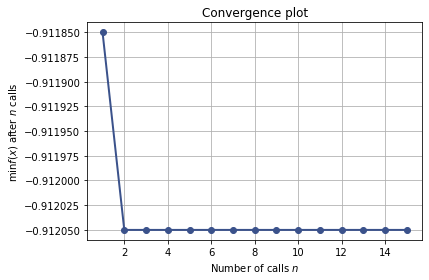

In [73]:
if __name__ == '__main__':
    search_result = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI',
                                n_calls=nb_calls,
                                x0=default_parameters,
                                n_jobs=-1,
                                verbose=True,
                                random_state=1234)
    
print(search_result.x)
print(search_result.fun)
plot = plot_convergence(search_result)

In [102]:
# Les meilleurs hyperparamètres étant trouvés, nous allons maintenant entrainemer le modèle avec ces hyperparamètres
RD_model_LP = LabelPowerset(RandomForestClassifier(criterion='entropy',
                                                    n_estimators=2316,
                                                    n_jobs=-1
))

In [103]:
# Puisqu'il s'agit du modèle final, nous recombinons le train set et le validation set pour former le train set final
RD_model_LP.fit(X_train_val,y_train_val)

LabelPowerset(classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                class_weight=None,
                                                criterion='entropy',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=2316, n_jobs=-1,
                                                oob_score=False,
           

In [104]:
# Testons le modèle pour trouver la performance globale
RD_model_LP.score(X_test,y_test)

0.91615

In [105]:
RD_model_LP.score(X_train_val,y_train_val)

0.9985

## Classifier Chain with Random Forest

In [74]:
@result
@use_named_args(dimensions=dimensions)
def fitness(criterion,n_estimators):
    xg_opt = ClassifierChain(RandomForestClassifier(criterion=criterion,
                                                   n_estimators=n_estimators,
                                                   random_state=1234,
                                                   n_jobs=-1))
    xg_opt.fit(X_train, y_train)
    accurracy = xg_opt.score(X_val, y_val)
    return -accurracy

Iteration No: 1 started. Evaluating function at provided point.
['gini', 820]
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 194.7077
Function value obtained: -0.8909
Current minimum: -0.8909
Iteration No: 2 started. Evaluating function at random point.
['gini', 2455]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 571.7154
Function value obtained: -0.8914
Current minimum: -0.8914
Iteration No: 3 started. Evaluating function at random point.
['entropy', 2316]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 540.9977
Function value obtained: -0.8971
Current minimum: -0.8971
Iteration No: 4 started. Evaluating function at random point.
['entropy', 460]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 116.9182
Function value obtained: -0.8965
Current minimum: -0.8971
Iteration No: 5 started. Evaluating function at random point.
['gini', 2447]
Iteration No: 5 ended. Evaluation done at random point.
Time taken:

/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


['entropy', 2999]
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 692.2587
Function value obtained: -0.8967
Current minimum: -0.8971
Iteration No: 15 started. Searching for the next optimal point.
['entropy', 3000]
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 687.6982
Function value obtained: -0.8966
Current minimum: -0.8971
['entropy', 2316]
-0.8971


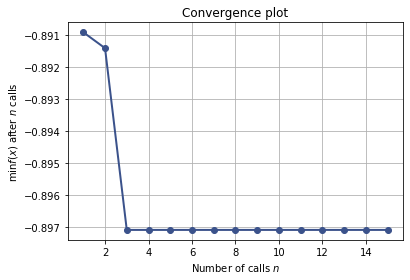

In [75]:
if __name__ == '__main__':
    search_result = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI',
                                n_calls=nb_calls,
                                x0=default_parameters,
                                n_jobs=-1,
                                verbose=True,
                                random_state=1234)
    
print(search_result.x)
print(search_result.fun)
plot = plot_convergence(search_result)

### Recapitulatif du CC avec RD

In [94]:
RD_model_CC = ClassifierChain(RandomForestClassifier(criterion='entropy',
                                                    n_estimators=2316,
                                                    n_jobs=-1
))

In [95]:
RD_model_CC.fit(X_train_val,y_train_val)

ClassifierChain(classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='entropy',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=2316, n_jobs=-1,
                                                  

In [96]:
RD_model_CC.score(X_test,y_test)

0.90615

In [97]:
RD_model_CC.score(X_train_val,y_train_val)

0.9985

## BinaryRelevance with Random Forest

In [76]:
@result
@use_named_args(dimensions=dimensions)
def fitness(criterion,n_estimators):
    xg_opt = BinaryRelevance(RandomForestClassifier(criterion=criterion,
                                                   n_estimators=n_estimators,
                                                   random_state=1234,
                                                   n_jobs=-1))
    xg_opt.fit(X_train, y_train)
    accurracy = xg_opt.score(X_val, y_val)
    return -accurracy

Iteration No: 1 started. Evaluating function at provided point.
['gini', 820]
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 210.5248
Function value obtained: -0.8750
Current minimum: -0.8750
Iteration No: 2 started. Evaluating function at random point.
['gini', 2455]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 615.8529
Function value obtained: -0.8760
Current minimum: -0.8760
Iteration No: 3 started. Evaluating function at random point.
['entropy', 2316]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 573.8202
Function value obtained: -0.8790
Current minimum: -0.8790
Iteration No: 4 started. Evaluating function at random point.
['entropy', 460]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 121.7526
Function value obtained: -0.8783
Current minimum: -0.8790
Iteration No: 5 started. Evaluating function at random point.
['gini', 2447]
Iteration No: 5 ended. Evaluation done at random point.
Time taken:

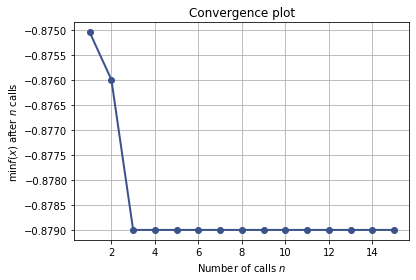

In [77]:
if __name__ == '__main__':
    search_result = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI',
                                n_calls=nb_calls,
                                x0=default_parameters,
                                n_jobs=-1,
                                verbose=True,
                                random_state=1234)
    
print(search_result.x)
print(search_result.fun)
plot = plot_convergence(search_result)

### Recapitulatif du BR avec Random Forest

In [90]:
RD_model_br = BinaryRelevance(RandomForestClassifier(criterion='entropy',
                                                    n_estimators=2316,
                                                    n_jobs=-1
))

In [91]:
RD_model_br.fit(X_train_val,y_train_val)

BinaryRelevance(classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='entropy',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=2316, n_jobs=-1,
                                                  

In [92]:
RD_model_br.score(X_test,y_test)

0.88805

In [93]:
RD_model_br.score(X_train_val,y_train_val)

0.9984375

## Neural Network (Multi Layer Perceptron)

### Skopt Parameters for Neural Network hyperparameters tuning

In [35]:
hidden_layer=Integer(low=1,high=20,name='hidden_layer')
hidden_nodes=Integer(low=20,high=200,name='hidden_nodes')
activation=Categorical(('relu','tanh','logistic','identity'),name='activation')
solver=Categorical(('adam','sgd'),name='solver')
alpha=Real(low=0.00001,high=0.001,name='alpha')
learning_rate=Categorical(('constant','invscaling','adaptive'),name='learning_rate')
momentum = Real(low=0,high=1,name='momentum')

In [36]:
dimensions = [hidden_layer,hidden_nodes,activation,solver,alpha,learning_rate,momentum]
nb_calls = 11
default_parameters = [7, 164, 'relu', 'adam', 0.0004482360224696307, 'constant',0.9]

### Binary Relevance with Neural Network

In [41]:
@result
@use_named_args(dimensions=dimensions)
def fitness(hidden_layer,hidden_nodes,activation,solver,alpha,learning_rate,momentum):
    # generate the hidden layers tuple for the given hidden_layer and the hidden_nodes per layer
    hidden_layer_sizes = []
    for i in range(hidden_layer):
            hidden_layer_sizes.append(hidden_nodes)
    hidden_layer_sizes = tuple(hidden_layer_sizes)
    
    xg_opt = BinaryRelevance(MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                                           activation=activation,
                                           solver=solver,
                                           alpha=alpha,
                                           learning_rate=learning_rate,
                                           early_stopping=True,
                                           momentum=momentum,
                                           random_state=1234,
                                           verbose=0))
    xg_opt.fit(X_train, y_train)
    accurracy = xg_opt.score(X_val, y_val)
    return -accurracy

Iteration No: 1 started. Evaluating function at provided point.
[7, 164, 'relu', 'adam', 0.0004482360224696307, 'constant', 0.9]
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 2395.8461
Function value obtained: -0.8293
Current minimum: -0.8293
Iteration No: 2 started. Evaluating function at random point.
[10, 167, 'logistic', 'sgd', 0.0008620630736639105, 'constant', 0.19851875902617105]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2151.8793
Function value obtained: -0.6466
Current minimum: -0.8293
Iteration No: 3 started. Evaluating function at random point.
[16, 49, 'relu', 'adam', 0.000491965108935746, 'constant', 0.8026395691204874]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1920.5821
Function value obtained: -0.8157
Current minimum: -0.8293
Iteration No: 4 started. Evaluating function at random point.
[3, 30, 'tanh', 'adam', 0.0002978212677226572, 'constant', 0.7382867680147006]
Iteration No: 4 ended. Evaluatio

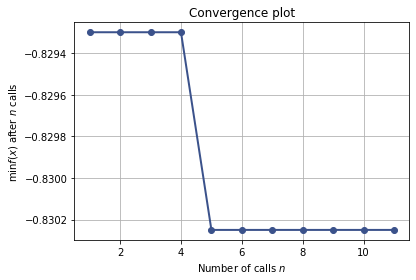

In [42]:
if __name__ == '__main__':
    search_result_br = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI',
                                n_calls=nb_calls,
                                x0=default_parameters,
                                n_jobs=-1,
                                verbose=True,
                                random_state=1234)
    
print(search_result_br.x)
print(search_result_br.fun)
plot = plot_convergence(search_result_br)

#### Refit the Neural Net model with the optimal parameters for the Binary Relevance

In [43]:
hidden_layer_sizes = []
for i in range(18):
    hidden_layer_sizes.append(198)
hidden_layer_sizes = tuple(hidden_layer_sizes)

In [44]:
_NN_model_br = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                            activation='relu',
                            solver='adam',
                            alpha=0.00045820251117073416,
                            learning_rate='invscaling',
                            momentum=0.7906221025946449,
                            random_state=1234,
                            early_stopping=True
                           )
NN_model_br = BinaryRelevance(_NN_model_br)

In [45]:
NN_model_br.fit(X_train_val,y_train_val)

KeyboardInterrupt: 

In [ ]:
NN_model_br.score(X_test,y_test)

In [ ]:
NN_model_br.score(X_train_val,y_train_val)

### Classifier Chain with Neural Net MLP

In [37]:
@result
@use_named_args(dimensions=dimensions)
def fitness(hidden_layer,hidden_nodes,activation,solver,alpha,learning_rate,momentum):
    # generate the hidden layers tuple for the given hidden_layer and the hidden_nodes per layer
    hidden_layer_sizes = []
    for i in range(hidden_layer):
            hidden_layer_sizes.append(hidden_nodes)
    hidden_layer_sizes = tuple(hidden_layer_sizes)
    
    xg_opt = ClassifierChain(MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                                           activation=activation,
                                           solver=solver,
                                           alpha=alpha,
                                           learning_rate=learning_rate,
                                           early_stopping=True,
                                           momentum=momentum,
                                           random_state=1234,
                                           verbose=0))
    xg_opt.fit(X_train, y_train)
    accurracy = xg_opt.score(X_val, y_val)
    return -accurracy

Iteration No: 1 started. Evaluating function at provided point.
[7, 164, 'relu', 'adam', 0.0004482360224696307, 'constant', 0.9]
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 172.5090
Function value obtained: -0.8768
Current minimum: -0.8768
Iteration No: 2 started. Evaluating function at random point.
[10, 167, 'logistic', 'sgd', 0.0008620630736639105, 'constant', 0.19851875902617105]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 79.6793
Function value obtained: -0.6466
Current minimum: -0.8768
Iteration No: 3 started. Evaluating function at random point.
[16, 49, 'relu', 'adam', 0.000491965108935746, 'constant', 0.8026395691204874]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 251.4406
Function value obtained: -0.8505
Current minimum: -0.8768
Iteration No: 4 started. Evaluating function at random point.
[3, 30, 'tanh', 'adam', 0.0002978212677226572, 'constant', 0.7382867680147006]
Iteration No: 4 ended. Evaluation do

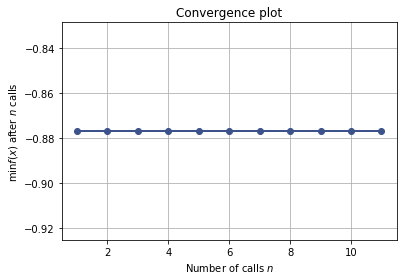

In [40]:
if __name__ == '__main__':
    search_result_cc = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI',
                                n_calls=nb_calls,
                                x0=default_parameters,
                                n_jobs=-1,
                                verbose=True,
                                random_state=1234)
    
print(search_result_cc.x)
print(search_result_cc.fun)
plot = plot_convergence(search_result_cc)

#### Refit the Neural Net model with the optimal parameters for the ClassifierChain

In [32]:
hidden_layer_sizes = []
for i in range(7):
    hidden_layer_sizes.append(164)
hidden_layer_sizes = tuple(hidden_layer_sizes)

In [33]:
_NN_model_cc = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                            activation='relu',
                            solver='adam',
                            alpha=0.0004482360224696307,
                            learning_rate='constant',
                            momentum=0.9,
                            random_state=1234,
                            early_stopping=True
                           )
NN_model_cc = ClassifierChain(_NN_model_cc)

In [34]:
NN_model_cc.fit(X_train_val,y_train_val)

ClassifierChain(classifier=MLPClassifier(activation='relu',
                                         alpha=0.0004482360224696307,
                                         batch_size='auto', beta_1=0.9,
                                         beta_2=0.999, early_stopping=True,
                                         epsilon=1e-08,
                                         hidden_layer_sizes=(164, 164, 164, 164,
                                                             164, 164, 164),
                                         learning_rate='constant',
                                         learning_rate_init=0.001,
                                         max_fun=15000, max_iter=200,
                                         momentum=0.9, n_iter_no_change=10,
                                         nesterovs_momentum=True, power_t=0.5,
                                         random_state=1234, shuffle=True,
                                         solver='adam', tol=0.0001,
       

In [35]:
NN_model_cc.score(X_test,y_test)

0.8798

In [36]:
NN_model_cc.score(X_train_val,y_train_val)

0.9314125

### Label Powerset with Neural Net MLP

In [38]:
@result
@use_named_args(dimensions=dimensions)
def fitness(hidden_layer,hidden_nodes,activation,solver,alpha,learning_rate,momentum):
    # generate the hidden layers tuple for the given hidden_layer and the hidden_nodes per layer
    hidden_layer_sizes = []
    for i in range(hidden_layer):
            hidden_layer_sizes.append(hidden_nodes)
    hidden_layer_sizes = tuple(hidden_layer_sizes)
    
    xg_opt = LabelPowerset(MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                                           activation=activation,
                                           solver=solver,
                                           alpha=alpha,
                                           learning_rate=learning_rate,
                                         early_stopping=True,
                                         momentum=momentum,
                                           random_state=1234,
                                           verbose=0))
    xg_opt.fit(X_train, y_train)
    accurracy = xg_opt.score(X_val, y_val)
    return -accurracy

Iteration No: 1 started. Evaluating function at provided point.
[7, 164, 'relu', 'adam', 0.0004482360224696307, 'constant', 0.9]
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 181.0495
Function value obtained: -0.8768
Current minimum: -0.8768
Iteration No: 2 started. Evaluating function at random point.
[10, 167, 'logistic', 'sgd', 0.0008620630736639105, 'constant', 0.19851875902617105]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 80.9539
Function value obtained: -0.6466
Current minimum: -0.8768
Iteration No: 3 started. Evaluating function at random point.
[16, 49, 'relu', 'adam', 0.000491965108935746, 'constant', 0.8026395691204874]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 256.2225
Function value obtained: -0.8505
Current minimum: -0.8768
Iteration No: 4 started. Evaluating function at random point.
[3, 30, 'tanh', 'adam', 0.0002978212677226572, 'constant', 0.7382867680147006]
Iteration No: 4 ended. Evaluation do

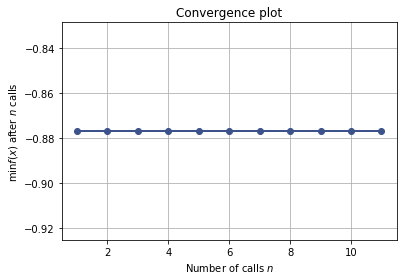

In [39]:
if __name__ == '__main__':
    search_result_lp = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI',
                                n_calls=nb_calls,
                                x0=default_parameters,
                                n_jobs=-1,
                                verbose=True,
                                random_state=1234)
    
print(search_result_lp.x)
print(search_result_lp.fun)
plot = plot_convergence(search_result_lp)

#### Refit the Neural Net model with the optimal parameters for the Label Powerset

In [37]:
hidden_layer_sizes = []
for i in range(7):
    hidden_layer_sizes.append(164)
hidden_layer_sizes = tuple(hidden_layer_sizes)

In [39]:
_NN_model_lp= MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                            activation='relu',
                            solver='adam',
                            alpha=0.0004482360224696307,
                            learning_rate='constant',
                            momentum=0.9,
                            random_state=1234,
                            early_stopping=True
                           )
NN_model_lp = LabelPowerset(_NN_model_lp)

In [40]:
NN_model_lp.fit(X_train_val,y_train_val)

LabelPowerset(classifier=MLPClassifier(activation='relu',
                                       alpha=0.0004482360224696307,
                                       batch_size='auto', beta_1=0.9,
                                       beta_2=0.999, early_stopping=True,
                                       epsilon=1e-08,
                                       hidden_layer_sizes=(164, 164, 164, 164,
                                                           164, 164, 164),
                                       learning_rate='constant',
                                       learning_rate_init=0.001, max_fun=15000,
                                       max_iter=200, momentum=0.9,
                                       n_iter_no_change=10,
                                       nesterovs_momentum=True, power_t=0.5,
                                       random_state=1234, shuffle=True,
                                       solver='adam', tol=0.0001,
                                   

In [41]:
NN_model_lp.score(X_test,y_test)

0.8831

In [42]:
NN_model_lp.score(X_train_val,y_train_val)

0.9566

## Analyse des resutats

In [ ]:
plt.figure(figsize=(20,8))
plt.style.use("fivethirtyeight")
methode = ['BinaryRelevance','ClassifierChain','LabelPowerset']
x_indexes = np.arange(len(methode))
width = 0.5

test_score_nn = [0.82,0.8798,0.8831]
test_score_rf = [0.881,0.9085,0.9165]
plt.bar(methode, test_score_nn,label="Neural Network")
plt.bar(x_indexes, test_score_rf, label="RandomForest")
plt.legend()
plt.title("Score de test des modèles")
plt.xlabel("Methode")
#plt.xticks(ticks=x_indexes,labels=methode)
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

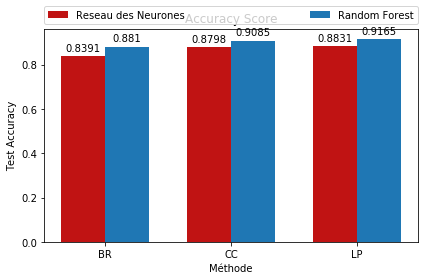

In [50]:
#plt.figure(figsize=(20,25))
labels = ['BR','CC','LP']
score_nn = [0.8391,0.8798,0.8831]
score_rf = [0.881,0.9085,0.9165]
#exec_nn = [2787.58,2056.9,330]
#exec_rf = [302,272.8,37.5]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, score_nn, width, color ="#C01313",label="Reseau des Neurones")
rects2 = ax.bar(x + width/2, score_rf, width, label="Random Forest")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test Accuracy')
ax.set_xlabel('Méthode')
#ax.set_title('Methodes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
ax.set_title("Accuracy Score")
fig.tight_layout()
plt.savefig("score.png",bbox_inches="tight")
plt.show()